# Can You Really Buy a Championship?

In this project I will look to get a better understanding of how salary and player performance are related and how that may translate into winning World Series championships. 

>- Do the highest paid athletes back up their salary with top notch performance? Or do these athletes get complacent after their big pay day and slack off? 


>- How often does the team with highest overall payroll win the World Series?

Below we will explore baseball data from 1871 to 2016 to try and answer these questions along with any other interesting questions that may arise throughout the analysis. The main statistics that will be observed for the purposes of this anlysis will be related to batting and pitching production.

## Gather Data

In [47]:
#Import all necessary packages
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

In [48]:
#Load in data files for analyzing
teams_df = pd.read_csv('teams.csv')
salaries_df = pd.read_csv('salaries.csv')
master_df = pd.read_csv('master.csv')
batting_df = pd.read_csv('batting.csv')
pitching_df = pd.read_csv('pitching.csv')

## Assess Data

In [49]:
teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60,19.0,73.0,NaN,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,225,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60,22.0,69.0,NaN,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,218,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26,25.0,18.0,NaN,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,223,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33,9.0,16.0,NaN,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33,15.0,46.0,NaN,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,227,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [50]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 48 columns):
yearID            2835 non-null int64
lgID              2785 non-null object
teamID            2835 non-null object
franchID          2835 non-null object
divID             1318 non-null object
Rank              2835 non-null int64
G                 2835 non-null int64
Ghome             2436 non-null float64
W                 2835 non-null int64
L                 2835 non-null int64
DivWin            1290 non-null object
WCWin             654 non-null object
LgWin             2807 non-null object
WSWin             2478 non-null object
R                 2835 non-null int64
AB                2835 non-null int64
H                 2835 non-null int64
2B                2835 non-null int64
3B                2835 non-null int64
HR                2835 non-null int64
BB                2835 non-null int64
SO                2715 non-null float64
SB                2691 non-null float64
CS    

In [51]:
#Review if a World Series was played in any particular year

years_ws = teams_df[['yearID','WSWin']].groupby('yearID', as_index=False).sum()
years_ws

,yearID,WSWin
0,1871,NaN
1,1872,NaN
2,1873,NaN
3,1874,NaN
4,1875,NaN
5,1876,NaN
6,1877,NaN
7,1878,NaN
8,1879,NaN
9,1880,NaN


In [52]:
#Create a list of years where a World Series was played and won

years_ws = years_ws[years_ws['WSWin'].str.contains('Y', na=False)]
years_ws.head()

,yearID,WSWin
15,1886,NNNNNNNNNNNNNYNN
16,1887,NNNNNNYNNNNNNNNN
17,1888,NNNNNNNNNNYNNNNN
18,1889,NNNNNNNNNNYNNNNN
32,1903,YNNNNNNNNNNNNNNN


Since there were a number of years where a World Series was not played or no World Series was won, we do not want to include those years in this analysis. 

>- Remove unnecessary columns ('lgID', 'IPouts' -> 'FP', 'park' -> 'teamIDretro', etc.)
>- Remove any years not listed in the **years_ws** dataframe

In [53]:
salaries_df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [54]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [55]:
salaries_df['yearID'].describe()

count    26428.000000
mean      2000.878727
std          8.909314
min       1985.000000
25%       1994.000000
50%       2001.000000
75%       2009.000000
max       2016.000000
Name: yearID, dtype: float64

>- The salaries data starts from the year 1985. The **teams_df** should reflect teams starting in 1985 (years prior should be removed

In [56]:
master_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [57]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19105 entries, 0 to 19104
Data columns (total 24 columns):
playerID        19105 non-null object
birthYear       18973 non-null float64
birthMonth      18803 non-null float64
birthDay        18656 non-null float64
birthCountry    19036 non-null object
birthState      18534 non-null object
birthCity       18925 non-null object
deathYear       9441 non-null float64
deathMonth      9440 non-null float64
deathDay        9439 non-null float64
deathCountry    9436 non-null object
deathState      9390 non-null object
deathCity       9431 non-null object
nameFirst       19068 non-null object
nameLast        19105 non-null object
nameGiven       19068 non-null object
weight          18251 non-null float64
height          18320 non-null float64
bats            17920 non-null object
throws          18126 non-null object
debut           18910 non-null object
finalGame       18910 non-null object
retroID         19049 non-null object
bbrefID        

In [58]:
master_df[master_df['debut'].isnull()]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
55,actama99,1969.0,1.0,11.0,D.R.,San Pedro de Macoris,San Pedro de Macoris,NaN,NaN,NaN,NaN,NaN,NaN,Manny,Acta,Manuel Elias,172.0,74.0,R,R,NaN,NaN,actam801,actama99
56,adairbi99,1913.0,2.0,10.0,USA,AL,Mobile,2002.0,6.0,17.0,USA,AL,Bay Minette,Bill,Adair,Marion Danne,168.0,72.0,R,R,NaN,NaN,adaib801,adairbi99
444,armoubi99,1869.0,9.0,3.0,USA,PA,Homestead,1922.0,12.0,2.0,USA,MN,Minneapolis,Bill,Armour,William Reginald,NaN,NaN,NaN,NaN,NaN,NaN,armob801,armoubi99
703,bancrfr99,1846.0,5.0,9.0,USA,MA,Lancaster,1921.0,3.0,30.0,USA,OH,Cincinnati,Frank,Bancroft,Frank Carter,NaN,NaN,NaN,NaN,NaN,NaN,bancf801,bancrfr99
770,barlial99,1915.0,4.0,2.0,USA,IL,Springfield,1995.0,12.0,27.0,USA,IL,Springfield,Al,Barlick,Albert Joseph,185.0,71.0,NaN,NaN,NaN,NaN,barla901,barlial99
845,barroed99,1868.0,5.0,10.0,USA,IL,Springfield,1953.0,12.0,15.0,USA,NY,Port Chester,Ed,Barrow,Edward Grant,NaN,NaN,NaN,NaN,NaN,NaN,barre801,barroed99
1086,bellco99,1903.0,5.0,17.0,USA,MS,Starkville,1991.0,3.0,7.0,USA,MO,St. Louis,Cool Papa,Bell,James Thomas,155.0,72.0,B,L,NaN,NaN,NaN,bellco99
1287,bevinte99,1956.0,7.0,7.0,USA,OH,Akron,NaN,NaN,NaN,NaN,NaN,NaN,Terry,Bevington,Terry Paul,190.0,74.0,R,R,NaN,NaN,bevit801,bevinte99
1288,bezdehu99,1883.0,4.0,1.0,Czech Republic,NaN,Prague,1952.0,9.0,19.0,USA,NJ,Atlantic City,Hugo,Bezdek,Hugo Francis,NaN,NaN,NaN,NaN,NaN,NaN,bezdh801,bezdehu99
1296,bicke99,1848.0,NaN,NaN,USA,DC,Washington,1916.0,2.0,9.0,USA,DC,Washington,John,Bickerton,John A.,NaN,NaN,NaN,NaN,NaN,NaN,bicku801,bickejo99


>**master_df** contains player info not related to baseball performance. Some of these variables may be interesting to explore later in this report so I will keep all the columns.

In [59]:
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [60]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 22 columns):
playerID    102816 non-null object
yearID      102816 non-null int64
stint       102816 non-null int64
teamID      102816 non-null object
lgID        102079 non-null object
G           102816 non-null int64
AB          102816 non-null int64
R           102816 non-null int64
H           102816 non-null int64
2B          102816 non-null int64
3B          102816 non-null int64
HR          102816 non-null int64
RBI         102392 non-null float64
SB          101516 non-null float64
CS          79360 non-null float64
BB          102816 non-null int64
SO          94978 non-null float64
IBB         66251 non-null float64
HBP         100006 non-null float64
SH          96478 non-null float64
SF          66782 non-null float64
GIDP        76706 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.3+ MB


>- Removed rows prior to 1985
>- Drop 'IBB', 'HBP', 'SH', 'SF', 'GIDP' columns as they are not needed for this anlysis

In [61]:
pitching_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [62]:
pitching_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44963 entries, 0 to 44962
Data columns (total 30 columns):
playerID    44963 non-null object
yearID      44963 non-null int64
stint       44963 non-null int64
teamID      44963 non-null object
lgID        44832 non-null object
W           44963 non-null int64
L           44963 non-null int64
G           44963 non-null int64
GS          44963 non-null int64
CG          44963 non-null int64
SHO         44963 non-null int64
SV          44963 non-null int64
IPouts      44963 non-null int64
H           44963 non-null int64
ER          44963 non-null int64
HR          44963 non-null int64
BB          44963 non-null int64
SO          44963 non-null int64
BAOpp       43437 non-null float64
ERA         44874 non-null float64
IBB         30388 non-null float64
WP          44830 non-null float64
HBP         44405 non-null float64
BK          44963 non-null int64
BFP         44724 non-null float64
GF          44830 non-null float64
R           4496

>- Removed rows prior to 1985

## Clean Data

In [63]:
#Create copies of dataframes
teams_df_copy = teams_df.copy()
salaries_df_copy = salaries_df.copy()
master_df_copy = master_df.copy()
batting_df_copy = batting_df.copy()
pitching_df_copy = pitching_df.copy()

### teams_df

In [64]:
teams_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 48 columns):
yearID            2835 non-null int64
lgID              2785 non-null object
teamID            2835 non-null object
franchID          2835 non-null object
divID             1318 non-null object
Rank              2835 non-null int64
G                 2835 non-null int64
Ghome             2436 non-null float64
W                 2835 non-null int64
L                 2835 non-null int64
DivWin            1290 non-null object
WCWin             654 non-null object
LgWin             2807 non-null object
WSWin             2478 non-null object
R                 2835 non-null int64
AB                2835 non-null int64
H                 2835 non-null int64
2B                2835 non-null int64
3B                2835 non-null int64
HR                2835 non-null int64
BB                2835 non-null int64
SO                2715 non-null float64
SB                2691 non-null float64
CS    

#### Issues

>- Remove unnecessary columns ('lgID', 'IPouts' -> 'FP', 'park' -> 'teamIDretro', etc.)
>- Remove any years not listed in the **years_ws** dataframe

#### Clean

In [65]:
teams_df_copy.drop(['lgID','Ghome','divID','DivWin','WCWin','LgWin','IPouts','HA','HRA','BBA','SOA','E','DP','FP','park',
                     'attendance','BPF','PPF','CS','HBP','SF', 'teamIDBR','teamIDlahman45','teamIDretro'], 
                    axis=1,
                    inplace=True)

In [66]:
teams_df_copy = teams_df_copy[teams_df_copy['yearID'].isin(years_ws['yearID'])]

teams_df_copy.head()

,yearID,teamID,franchID,Rank,G,W,L,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,name
173,1886,BL2,BLO,8,139,48,83,N,625,4639,945,124,51,8,379,603.0,269.0,878,547,4.08,134,5,0,Baltimore Orioles
174,1886,BR3,LAD,3,141,76,61,N,832,5053,1261,196,80,16,433,523.0,248.0,832,469,3.42,138,6,0,Brooklyn Grays
175,1886,BSN,ATL,5,118,56,61,N,657,4180,1085,151,59,24,250,537.0,156.0,661,370,3.24,116,3,0,Boston Beaneaters
176,1886,CHN,CHC,1,126,90,34,N,900,4378,1223,198,87,53,460,513.0,213.0,555,310,2.54,116,8,3,Chicago White Stockings
177,1886,CN2,CIN,5,141,65,73,N,883,4915,1225,145,95,45,374,633.0,185.0,865,579,4.18,129,3,0,Cincinnati Red Stockings


In [67]:
teams_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2392 entries, 173 to 2834
Data columns (total 24 columns):
yearID      2392 non-null int64
teamID      2392 non-null object
franchID    2392 non-null object
Rank        2392 non-null int64
G           2392 non-null int64
W           2392 non-null int64
L           2392 non-null int64
WSWin       2392 non-null object
R           2392 non-null int64
AB          2392 non-null int64
H           2392 non-null int64
2B          2392 non-null int64
3B          2392 non-null int64
HR          2392 non-null int64
BB          2392 non-null int64
SO          2280 non-null float64
SB          2392 non-null float64
RA          2392 non-null int64
ER          2392 non-null int64
ERA         2392 non-null float64
CG          2392 non-null int64
SHO         2392 non-null int64
SV          2392 non-null int64
name        2392 non-null object
dtypes: float64(3), int64(17), object(4)
memory usage: 467.2+ KB


### salaries_df

#### Issues

>- The salaries data starts from the year 1985. The **teams_df** should reflect teams starting in 1985 (years prior should be removed

#### Clean

In [68]:
teams_df_copy = teams_df_copy[teams_df_copy['yearID'] >= 1985]
teams_df_copy['yearID'].describe()

count     890.000000
mean     2001.197753
std         9.192675
min      1985.000000
25%      1993.000000
50%      2002.000000
75%      2009.000000
max      2016.000000
Name: yearID, dtype: float64

### batting_df

In [69]:
batting_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 22 columns):
playerID    102816 non-null object
yearID      102816 non-null int64
stint       102816 non-null int64
teamID      102816 non-null object
lgID        102079 non-null object
G           102816 non-null int64
AB          102816 non-null int64
R           102816 non-null int64
H           102816 non-null int64
2B          102816 non-null int64
3B          102816 non-null int64
HR          102816 non-null int64
RBI         102392 non-null float64
SB          101516 non-null float64
CS          79360 non-null float64
BB          102816 non-null int64
SO          94978 non-null float64
IBB         66251 non-null float64
HBP         100006 non-null float64
SH          96478 non-null float64
SF          66782 non-null float64
GIDP        76706 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.3+ MB


#### Issues

>- Removed rows with yearID prior to 1985
>- Drop 'IBB', 'HBP', 'SH', 'SF', 'GIDP' columns as they are not needed for this anlysis

#### Clean

In [70]:
batting_df_copy = batting_df_copy[batting_df_copy['yearID'] >= 1985]
batting_df_copy['yearID'].describe()

count    40577.000000
mean      2001.524657
std          9.085021
min       1985.000000
25%       1994.000000
50%       2002.000000
75%       2009.000000
max       2016.000000
Name: yearID, dtype: float64

In [72]:
batting_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40577 entries, 62239 to 102815
Data columns (total 22 columns):
playerID    40577 non-null object
yearID      40577 non-null int64
stint       40577 non-null int64
teamID      40577 non-null object
lgID        40577 non-null object
G           40577 non-null int64
AB          40577 non-null int64
R           40577 non-null int64
H           40577 non-null int64
2B          40577 non-null int64
3B          40577 non-null int64
HR          40577 non-null int64
RBI         40577 non-null float64
SB          40577 non-null float64
CS          40577 non-null float64
BB          40577 non-null int64
SO          40577 non-null float64
IBB         40577 non-null float64
HBP         40577 non-null float64
SH          40577 non-null float64
SF          40577 non-null float64
GIDP        40577 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 7.1+ MB


In [73]:
batting_df_copy['RBI'] = batting_df_copy['RBI'].astype(int)
batting_df_copy['SB'] = batting_df_copy['SB'].astype(int)
batting_df_copy['CS'] = batting_df_copy['CS'].astype(int)
batting_df_copy['SO'] = batting_df_copy['SO'].astype(int)

In [74]:
batting_df_copy.drop(['IBB','HBP','SH','SF','GIDP'], axis=1, inplace=True)

In [75]:
batting_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40577 entries, 62239 to 102815
Data columns (total 17 columns):
playerID    40577 non-null object
yearID      40577 non-null int64
stint       40577 non-null int64
teamID      40577 non-null object
lgID        40577 non-null object
G           40577 non-null int64
AB          40577 non-null int64
R           40577 non-null int64
H           40577 non-null int64
2B          40577 non-null int64
3B          40577 non-null int64
HR          40577 non-null int64
RBI         40577 non-null int32
SB          40577 non-null int32
CS          40577 non-null int32
BB          40577 non-null int64
SO          40577 non-null int32
dtypes: int32(4), int64(10), object(3)
memory usage: 5.0+ MB


### pitching_df

#### Issues

>- Removed rows prior to 1985

#### Clean

In [76]:
pitching_df_copy = pitching_df_copy[pitching_df_copy['yearID'] >= 1985]
pitching_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19983 entries, 24980 to 44962
Data columns (total 30 columns):
playerID    19983 non-null object
yearID      19983 non-null int64
stint       19983 non-null int64
teamID      19983 non-null object
lgID        19983 non-null object
W           19983 non-null int64
L           19983 non-null int64
G           19983 non-null int64
GS          19983 non-null int64
CG          19983 non-null int64
SHO         19983 non-null int64
SV          19983 non-null int64
IPouts      19983 non-null int64
H           19983 non-null int64
ER          19983 non-null int64
HR          19983 non-null int64
BB          19983 non-null int64
SO          19983 non-null int64
BAOpp       19342 non-null float64
ERA         19965 non-null float64
IBB         19983 non-null float64
WP          19983 non-null float64
HBP         19983 non-null float64
BK          19983 non-null int64
BFP         19983 non-null float64
GF          19983 non-null float64
R           

## Exploratory Data Analysis

In [113]:
# Review number of teams in the league each year
teams_df_copy = teams_df_copy[['yearID', 'franchID', 'teamID', 'name', 'WSWin']]

In [87]:
teams_df_copy = teams_df_copy.sort_values(['yearID','franchID'])

teams_df_copy.head()

,yearID,franchID,teamID,name,WSWin
1920,1985,ANA,CAL,California Angels,N
1917,1985,ATL,ATL,Atlanta Braves,N
1918,1985,BAL,BAL,Baltimore Orioles,N
1919,1985,BOS,BOS,Boston Red Sox,N
1922,1985,CHC,CHN,Chicago Cubs,N


In [122]:
number_of_teams = teams_df_copy['yearID'].value_counts().sort_index()

number_of_teams

1985    26
1986    26
1987    26
1988    26
1989    26
1990    26
1991    26
1992    26
1993    28
1995    28
1996    28
1997    28
1998    30
1999    30
2000    30
2001    30
2002    30
2003    30
2004    30
2005    30
2006    30
2007    30
2008    30
2009    30
2010    30
2011    30
2012    30
2013    30
2014    30
2015    30
2016    30
Name: yearID, dtype: int64

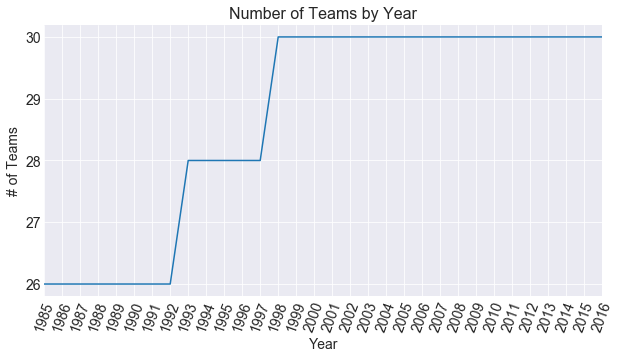

In [151]:
# Graph number of team in the league each year

sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))

teams_plot = number_of_teams.plot(x='Year', y='Teams',
                                  xticks=np.arange(min(teams_df_copy['yearID']),max(teams_df_copy['yearID'])+1,1),rot=70,
                                  yticks=np.arange(26,31,1),
                                  fontsize=14)

plt.title('Number of Teams by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('# of Teams', fontsize=14)

## Does the total salary of a team have a correlation with winning a World Series?

### Review Salary Data

In [397]:
#View sample of Salaries DataFrame
salaries_df = salaries_df.sort_values(['yearID', 'teamID'])

salaries_df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [398]:
#Review number of rows and columns
salaries_df.shape

(26428, 5)

In [399]:
#Review unique years
salaries_df['yearID'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [400]:
#Calculate total team salaries for each team, each year
total_team_salaries = salaries_df.groupby(['yearID', 'teamID'], as_index=False).sum()

total_team_salaries.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


In [401]:
total_team_salaries.shape

(918, 3)

In [402]:
#Calculate summary statistics for team salary for each year
team_salary_stats = total_team_salaries.groupby('yearID', as_index=False).agg(['min', 'max', 'mean'])['salary'].reset_index()

team_salary_stats.head()

,yearID,min,max,mean
0,1985,4613000,14807000,10075565
1,1986,5958309,18494253,11840558
2,1987,880000,17099714,10483668
3,1988,5342131,19441152,11555862
4,1989,7265410,21071562,13845988


In [403]:
avg_team_salary.shape

NameError: name 'avg_team_salary' is not defined

### Incorporate Salaries into Teams dataframe

In [404]:
teams_df.head()

,yearID,franchID,teamID,name,WSWin
0,1871,BNA,BS1,Boston Red Stockings,NaN
2,1871,CFC,CL1,Cleveland Forest Citys,NaN
1,1871,CNA,CH1,Chicago White Stockings,NaN
3,1871,KEK,FW1,Fort Wayne Kekiongas,NaN
4,1871,NNA,NY2,New York Mutuals,NaN


The teams_df dataframe has team data from 1871 to 2016, however, the salary dataset only has data from 1985 to 2016. For this reason, this project will focus on the years that are present in both sources of data (1985 to 2016)

In [405]:
teams_df = teams_df[teams_df['yearID'] >= 1985]

teams_df.head()

,yearID,franchID,teamID,name,WSWin
1920,1985,ANA,CAL,California Angels,N
1917,1985,ATL,ATL,Atlanta Braves,N
1918,1985,BAL,BAL,Baltimore Orioles,N
1919,1985,BOS,BOS,Boston Red Sox,N
1922,1985,CHC,CHN,Chicago Cubs,N


In [406]:
teams_df.shape

(918, 5)

Both teams_df and total_team_salaries dataframes contain 918 rows representing every team from 1985 to 2016

In [407]:
teams_with_salaries = pd.merge(teams_df, total_team_salaries, on=['yearID','teamID'], how='left')

teams_with_salaries.head()

,yearID,franchID,teamID,name,WSWin,salary
0,1985,ANA,CAL,California Angels,N,14427894.0
1,1985,ATL,ATL,Atlanta Braves,N,14807000.0
2,1985,BAL,BAL,Baltimore Orioles,N,11560712.0
3,1985,BOS,BOS,Boston Red Sox,N,10897560.0
4,1985,CHC,CHN,Chicago Cubs,N,12702917.0


In [408]:
#Check for Nan's
teams_with_salaries.isnull().sum()

yearID       0
franchID     0
teamID       0
name         0
WSWin       28
salary      11
dtype: int64

### Fix Problem Data

In [409]:
#Review NaN values in Salary column
print teams_with_salaries[teams_with_salaries['salary'].isnull()].head()

print teams_with_salaries[teams_with_salaries['salary'].isnull()].shape

     yearID franchID teamID                 name WSWin  salary
893    2016      CHC    CHN         Chicago Cubs     Y     NaN
894    2016      CHW    CHA    Chicago White Sox     N     NaN
901    2016      KCR    KCA   Kansas City Royals     N     NaN
902    2016      LAD    LAN  Los Angeles Dodgers     N     NaN
905    2016      NYM    NYN        New York Mets     N     NaN
(11, 6)


There are some teamID's that do not match between the teams and salaries datasets, which is causing NaN values in the 'salary' column in 2016.

This can be fixed using the .fillna function.

In [410]:
#Fill NaNs in salary column
teams_with_salaries.salary.fillna(total_team_salaries.salary, inplace=True)

In [411]:
teams_with_salaries.isnull().sum()

yearID       0
franchID     0
teamID       0
name         0
WSWin       28
salary       0
dtype: int64

In [412]:
#Review NaN values in WSWin column
print teams_with_salaries[teams_with_salaries['WSWin'].isnull()].head()

print teams_with_salaries[teams_with_salaries['WSWin'].isnull()].shape

     yearID franchID teamID               name WSWin      salary
236    1994      ANA    CAL  California Angels   NaN  25156218.0
237    1994      ATL    ATL     Atlanta Braves   NaN  49383513.0
238    1994      BAL    BAL  Baltimore Orioles   NaN  38849769.0
239    1994      BOS    BOS     Boston Red Sox   NaN  37859084.0
240    1994      CHC    CHN       Chicago Cubs   NaN  36287333.0
(28, 6)


***A Google search confirmed that there was no World Series game played in 1994 due to an MLB strike. Due to this, the 1994 data will be removed from this anlaysis.**

In [413]:
#Remove Nan rows from WSWin column
teams_with_salaries = teams_with_salaries[pd.notnull(teams_with_salaries['WSWin'])]

teams_with_salaries.head()

,yearID,franchID,teamID,name,WSWin,salary
0,1985,ANA,CAL,California Angels,N,14427894.0
1,1985,ATL,ATL,Atlanta Braves,N,14807000.0
2,1985,BAL,BAL,Baltimore Orioles,N,11560712.0
3,1985,BOS,BOS,Boston Red Sox,N,10897560.0
4,1985,CHC,CHN,Chicago Cubs,N,12702917.0


In [414]:
teams_with_salaries.isnull().sum()

yearID      0
franchID    0
teamID      0
name        0
WSWin       0
salary      0
dtype: int64

In [415]:
teams_with_salaries.shape

(890, 6)

### Analyze World Series Winning Teams

In [416]:
#Isolate only World Series winning teams
ws_winning_teams = teams_with_salaries[teams_with_salaries['WSWin'] == 'Y']

ws_winning_teams.head()

,yearID,franchID,teamID,name,WSWin,salary
10,1985,KCR,KCA,Kansas City Royals,Y,9321179.0
40,1986,NYM,NYN,New York Mets,Y,15393714.0
65,1987,MIN,MIN,Minnesota Twins,Y,6397500.0
89,1988,LAD,LAN,Los Angeles Dodgers,Y,16850515.0
120,1989,OAK,OAK,Oakland Athletics,Y,15613070.0


In [417]:
ws_winning_teams.shape

(31, 6)

In [418]:
#Add descriptive stats to ws_winning_teams dataframe
ws_winning_teams = pd.merge(ws_winning_teams, team_salary_stats, on='yearID', how='inner')

ws_winning_teams.head()

,yearID,franchID,teamID,name,WSWin,salary,min,max,mean
0,1985,KCR,KCA,Kansas City Royals,Y,9321179.0,4613000,14807000,10075565
1,1986,NYM,NYN,New York Mets,Y,15393714.0,5958309,18494253,11840558
2,1987,MIN,MIN,Minnesota Twins,Y,6397500.0,880000,17099714,10483668
3,1988,LAD,LAN,Los Angeles Dodgers,Y,16850515.0,5342131,19441152,11555862
4,1989,OAK,OAK,Oakland Athletics,Y,15613070.0,7265410,21071562,13845988


In [419]:
ws_winning_teams['salary'] = ws_winning_teams['salary'].astype(int)

ws_winning_teams.dtypes

yearID       int64
franchID    object
teamID      object
name        object
WSWin       object
salary       int64
min          int64
max          int64
mean         int64
dtype: object

In [420]:
#Check if World Series winning team had the max payroll
ws_winning_teams['max_salary_check'] = ws_winning_teams['salary'] - ws_winning_teams['max'] == 0

ws_winning_teams.head()

,yearID,franchID,teamID,name,WSWin,salary,min,max,mean,max_salary_check
0,1985,KCR,KCA,Kansas City Royals,Y,9321179,4613000,14807000,10075565,False
1,1986,NYM,NYN,New York Mets,Y,15393714,5958309,18494253,11840558,False
2,1987,MIN,MIN,Minnesota Twins,Y,6397500,880000,17099714,10483668,False
3,1988,LAD,LAN,Los Angeles Dodgers,Y,16850515,5342131,19441152,11555862,False
4,1989,OAK,OAK,Oakland Athletics,Y,15613070,7265410,21071562,13845988,False


In [421]:
ws_winning_teams['max_salary_check'].value_counts()

False    26
True      5
Name: max_salary_check, dtype: int64

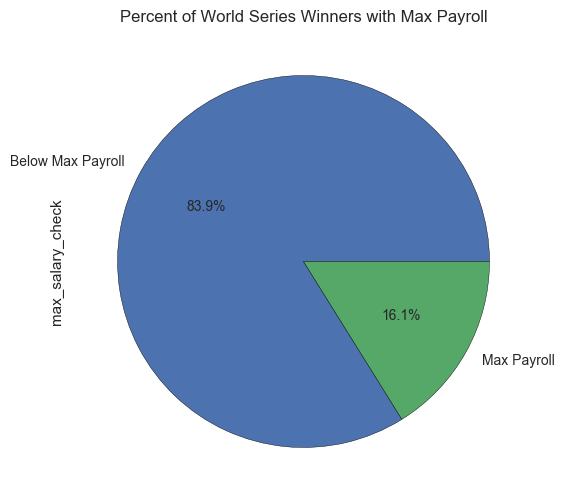

In [422]:
ws_winning_teams['max_salary_check'].value_counts().plot.pie(figsize=(6,6),
                                                             title='Percent of World Series Winners with Max Payroll',
                                                             labels=['Below Max Payroll', 'Max Payroll'],
                                                             autopct='%1.1f%%')

## What is the succes rate at which the team with the max payroll wins the World Series? [Conclusion]

Only 16% of the World Series winning teams from 1985 to 2016 (excluding 1994) held the highest team payroll. This could lead one to believe that there may not be a strong correlation between a team having the max payroll and also winning the World Series. This observation seems to contradict the notion that if you have the most money available to build a team of the best players, you can "buy" a championship. A hypothesis test would need to be performed to reinforce the above observation.

With the above observation, the next question to be investigated is "how are performance and salary related to each other?"

## How is Salary Related to Player Performance?

To answer this question I will take the salary of the top paid player at each position and compare the performance to others at the same position.

For this analysis, I will only be looking at offensive output such as hits, HRs, RBIs, etc for all positions except the pitcher. Pitchers will be evaluated for their devensive skills (strikeouts, ERA, etc)

### Review Player Salaries

In [424]:
#Create dataframe of each players' position by year
fielding_df = fielding_df[['yearID', 'playerID', 'POS']]

fielding_df.head()

,yearID,playerID,POS
0,1871,abercda01,SS
1,1871,addybo01,2B
2,1871,addybo01,SS
3,1871,allisar01,2B
4,1871,allisar01,OF


In [425]:
#Merge master_df to fielding_df
fielding_df = pd.merge(fielding_df, master_df, on=('playerID'), how='inner')

fielding_df.head()

,yearID,playerID,POS,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,1871,abercda01,SS,1850.0,1.0,2.0,USA,OK,Fort Towson,1939.0,11.0,11.0,USA,PA,Philadelphia,Frank,Abercrombie,Francis Patterson,NaN,NaN,NaN,NaN,1871-10-21,1871-10-21,aberd101,abercda01
1,1871,addybo01,2B,1842.0,2.0,NaN,CAN,ON,Port Hope,1910.0,4.0,9.0,USA,ID,Pocatello,Bob,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,1877-10-06,addyb101,addybo01
2,1871,addybo01,SS,1842.0,2.0,NaN,CAN,ON,Port Hope,1910.0,4.0,9.0,USA,ID,Pocatello,Bob,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,1877-10-06,addyb101,addybo01
3,1873,addybo01,2B,1842.0,2.0,NaN,CAN,ON,Port Hope,1910.0,4.0,9.0,USA,ID,Pocatello,Bob,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,1877-10-06,addyb101,addybo01
4,1873,addybo01,OF,1842.0,2.0,NaN,CAN,ON,Port Hope,1910.0,4.0,9.0,USA,ID,Pocatello,Bob,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,1877-10-06,addyb101,addybo01


In [426]:
#Choose only relevenant columns for fielding_df
fielding_df = fielding_df[['yearID', 'playerID', 'nameLast', 'nameFirst', 'POS']]

fielding_df.head()

,yearID,playerID,nameLast,nameFirst,POS
0,1871,abercda01,Abercrombie,Frank,SS
1,1871,addybo01,Addy,Bob,2B
2,1871,addybo01,Addy,Bob,SS
3,1873,addybo01,Addy,Bob,2B
4,1873,addybo01,Addy,Bob,OF


In [427]:
#check for errors
fielding_df.isnull().sum()

yearID        0
playerID      0
nameLast      0
nameFirst    45
POS           0
dtype: int64

In [430]:
#View NaN fields
fielding_df[fielding_df['nameFirst'].isnull()].head()

,yearID,playerID,nameLast,nameFirst,POS
1514,1872,higby01,Higby,NaN,OF
1675,1872,orour01,O'Rourke,NaN,P
1771,1872,spenc01,Spencer,NaN,SS
1921,1873,mcdoo01,McDoolan,NaN,P
2088,1874,gaver01,Gavern,NaN,2B


In [431]:
#Investigate NaN fields in master_df
nan_players = master_df[master_df['nameFirst'].isnull()]

nan_players.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
1529,bolan01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Boland,NaN,NaN,NaN,NaN,NaN,1875-09-04,1875-09-04,bolau101,bolan01
1596,booth01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Booth,NaN,NaN,NaN,NaN,NaN,1875-05-01,1875-05-01,bootu101,booth01
2656,carroch01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carroll,NaN,NaN,NaN,NaN,NaN,1884-04-17,1884-04-21,carrc101,carroch01
4877,edwar01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edwards,NaN,NaN,NaN,NaN,NaN,1875-09-11,1875-09-11,edwau101,edwar01
5112,evans01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans,NaN,NaN,NaN,NaN,NaN,1875-06-01,1875-06-01,evanu101,evans01


In [432]:
#Investigate Nan fields in batting_df
batting_df[batting_df['playerID'].isin(nan_players['playerID'])].head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
184,higby01,1872,1,BR2,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
228,orour01,1872,1,BR1,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
248,spenc01,1872,1,WS4,NaN,1,4,1,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
346,mcdoo01,1873,1,BL4,NaN,1,4,1,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
438,gaver01,1874,1,BR2,NaN,1,4,1,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN


It seems as though the NaN values in the nameFirst column are due to players that had the same value for debut and finalGame (or were a few days apart) and did not get any meaningful status for this analysis. These players will be removed from the analysis.

In [433]:
#Remove NaN values from fielding_df
fielding_df = fielding_df.dropna(axis=0, how='any')

In [434]:
fielding_df.isnull().sum()

yearID       0
playerID     0
nameLast     0
nameFirst    0
POS          0
dtype: int64

In [435]:
#Merge POS and names from fielding_df to salary_df
salary_position_df = pd.merge(salaries_df, fielding_df, on=(['yearID','playerID']), how='inner')

salary_position_df = salary_position_df[['yearID','POS','teamID','playerID', 'nameLast', 'nameFirst', 'salary']].sort_values(['yearID','POS'])

salary_position_df.head()

,yearID,POS,teamID,playerID,nameLast,nameFirst,salary
5,1985,1B,ATL,chambch01,Chambliss,Chris,800000
10,1985,1B,ATL,hornebo01,Horner,Bob,1500000
20,1985,1B,ATL,perryge01,Perry,Gerald,120000
26,1985,1B,BAL,dauerri01,Dauer,Rich,480000
33,1985,1B,BAL,grosswa01,Gross,Wayne,483333


In [436]:
salary_position_df.isnull().sum()

yearID       0
POS          0
teamID       0
playerID     0
nameLast     0
nameFirst    0
salary       0
dtype: int64

In [437]:
#update index on salary_position_df
grouped_salary_position_df = salary_position_df.set_index(['yearID','POS'])

grouped_salary_position_df.head()

teamID   playerID   nameLast nameFirst   salary
yearID POS                                                
1985   1B     ATL  chambch01  Chambliss     Chris   800000
       1B     ATL  hornebo01     Horner       Bob  1500000
       1B     ATL  perryge01      Perry    Gerald   120000
       1B     BAL  dauerri01      Dauer      Rich   480000
       1B     BAL  grosswa01      Gross     Wayne   483333

In [438]:
grouped_salary_position_df.shape

(37519, 5)

In [439]:
#rename grouped_salary_position_df to salary_position_df
salary_position_df = grouped_salary_position_df

salary_position_df.head()

teamID   playerID   nameLast nameFirst   salary
yearID POS                                                
1985   1B     ATL  chambch01  Chambliss     Chris   800000
       1B     ATL  hornebo01     Horner       Bob  1500000
       1B     ATL  perryge01      Perry    Gerald   120000
       1B     BAL  dauerri01      Dauer      Rich   480000
       1B     BAL  grosswa01      Gross     Wayne   483333

In [440]:
max_salary_position = salary_position_df.reset_index().groupby(['yearID', 'POS']).max()['salary']

max_salary_position = max_salary_position.to_frame()

max_salary_position.head(7)

salary
yearID POS         
1985   1B   2130300
       2B   1242333
       3B   2130300
       C    2028571
       OF   2028571
       P    1713333
       SS   2130300

In [441]:
#Calculate difference from max salary
salary_position_df['diff_from_max'] = salary_position_df['salary'] - max_salary_position['salary']

salary_position_df.head()

teamID   playerID   nameLast nameFirst   salary  diff_from_max
yearID POS                                                               
1985   1B     ATL  chambch01  Chambliss     Chris   800000       -1330300
       1B     ATL  hornebo01     Horner       Bob  1500000        -630300
       1B     ATL  perryge01      Perry    Gerald   120000       -2010300
       1B     BAL  dauerri01      Dauer      Rich   480000       -1650300
       1B     BAL  grosswa01      Gross     Wayne   483333       -1646967

In [442]:
salary_position_df.shape

(37519, 6)

### Review Player Performance

For the purposes of this analysis, the metric to be measured for offensive output is RBIs. This will tell us how many runs a player was personally responsible for, and of course, the more runs your team has, the better chance you have at winning games.

For pitchers, the performance metric to be used will be ERA. The lower a pitchers' ERA, the less runs they allow from the opposing team.

In [443]:
#View batting_df as of 1985 and later
batting_df = batting_df[batting_df['yearID'] >= 1985]

batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
62239,aasedo01,1985,1,BAL,AL,54,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62240,abregjo01,1985,1,CHN,NL,6,9,0,0,0,0,0,1.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
62241,ackerji01,1985,1,TOR,AL,61,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62242,adamsri02,1985,1,SFN,NL,54,121,12,23,3,1,2,10.0,1.0,1.0,5,23.0,3.0,1.0,3.0,0.0,2.0
62243,agostju01,1985,1,CHA,AL,54,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [444]:
#Extract only data to be used for batting metrics
batting_df = batting_df[['playerID', 'yearID', 'RBI']]

batting_df.head()

,playerID,yearID,RBI
62239,aasedo01,1985,0.0
62240,abregjo01,1985,1.0
62241,ackerji01,1985,0.0
62242,adamsri02,1985,10.0
62243,agostju01,1985,0.0


In [445]:
#View pitch_df dataframe
pitching_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [446]:
#Extract only data to be used for pitching
pitching_df = pitching_df[['playerID', 'yearID', 'ERA']]

pitching_df.head()

,playerID,yearID,ERA
0,bechtge01,1871,7.96
1,brainas01,1871,4.50
2,fergubo01,1871,27.00
3,fishech01,1871,4.35
4,fleetfr01,1871,10.00


In [447]:
#Add RBIs to salary_position_df
salary_position_df = pd.merge(salary_position_df.reset_index(), batting_df,
        on=['yearID', 'playerID'],
        how='inner')

salary_position_df.head()

,yearID,POS,teamID,playerID,nameLast,nameFirst,salary,diff_from_max,RBI
0,1985,1B,ATL,chambch01,Chambliss,Chris,800000,-1330300,21.0
1,1985,1B,ATL,hornebo01,Horner,Bob,1500000,-630300,89.0
2,1985,3B,ATL,hornebo01,Horner,Bob,1500000,-630300,89.0
3,1985,1B,ATL,perryge01,Perry,Gerald,120000,-2010300,13.0
4,1985,OF,ATL,perryge01,Perry,Gerald,120000,-1908571,13.0


In [448]:
#Check for NaNs
salary_position_df.isnull().sum()

yearID           0
POS              0
teamID           0
playerID         0
nameLast         0
nameFirst        0
salary           0
diff_from_max    0
RBI              0
dtype: int64

In [449]:
#Add ERAs to salary_position_df
salary_position_df = pd.merge(salary_position_df, pitching_df,
        on=['yearID', 'playerID'],
        how='left')

salary_position_df.head()

,yearID,POS,teamID,playerID,nameLast,nameFirst,salary,diff_from_max,RBI,ERA
0,1985,1B,ATL,chambch01,Chambliss,Chris,800000,-1330300,21.0,NaN
1,1985,1B,ATL,hornebo01,Horner,Bob,1500000,-630300,89.0,NaN
2,1985,3B,ATL,hornebo01,Horner,Bob,1500000,-630300,89.0,NaN
3,1985,1B,ATL,perryge01,Perry,Gerald,120000,-2010300,13.0,NaN
4,1985,OF,ATL,perryge01,Perry,Gerald,120000,-1908571,13.0,NaN


In [450]:
#Calculated standardized RBI score
salary_position_df['standardized_RBI'] = (salary_position_df['RBI'] - salary_position_df['RBI'].mean()) / salary_position_df['RBI'].std()

salary_position_df.head()

,yearID,POS,teamID,playerID,nameLast,nameFirst,salary,diff_from_max,RBI,ERA,standardized_RBI
0,1985,1B,ATL,chambch01,Chambliss,Chris,800000,-1330300,21.0,NaN,0.095227
1,1985,1B,ATL,hornebo01,Horner,Bob,1500000,-630300,89.0,NaN,2.645853
2,1985,3B,ATL,hornebo01,Horner,Bob,1500000,-630300,89.0,NaN,2.645853
3,1985,1B,ATL,perryge01,Perry,Gerald,120000,-2010300,13.0,NaN,-0.204847
4,1985,OF,ATL,perryge01,Perry,Gerald,120000,-1908571,13.0,NaN,-0.204847


In [451]:
#Calculated standardized ERA score
salary_position_df['standardized_ERA'] = (salary_position_df['ERA'] - salary_position_df['ERA'].mean()) / salary_position_df['ERA'].std()

salary_position_df.head()

,yearID,POS,teamID,playerID,nameLast,nameFirst,salary,diff_from_max,RBI,ERA,standardized_RBI,standardized_ERA
0,1985,1B,ATL,chambch01,Chambliss,Chris,800000,-1330300,21.0,NaN,0.095227,NaN
1,1985,1B,ATL,hornebo01,Horner,Bob,1500000,-630300,89.0,NaN,2.645853,NaN
2,1985,3B,ATL,hornebo01,Horner,Bob,1500000,-630300,89.0,NaN,2.645853,NaN
3,1985,1B,ATL,perryge01,Perry,Gerald,120000,-2010300,13.0,NaN,-0.204847,NaN
4,1985,OF,ATL,perryge01,Perry,Gerald,120000,-1908571,13.0,NaN,-0.204847,NaN


In [452]:
#Top paid players at each position
max_salary_position_df = salary_position_df[salary_position_df['diff_from_max'] == 0]

max_salary_position_df.head(7)

,yearID,POS,teamID,playerID,nameLast,nameFirst,salary,diff_from_max,RBI,ERA,standardized_RBI,standardized_ERA
139,1985,C,NYN,cartega01,Carter,Gary,2028571,0,100.0,NaN,3.058454,NaN
140,1985,OF,NYN,cartega01,Carter,Gary,2028571,0,100.0,NaN,3.058454,NaN
163,1985,1B,PHI,schmimi01,Schmidt,Mike,2130300,0,93.0,NaN,2.795890,NaN
164,1985,3B,PHI,schmimi01,Schmidt,Mike,2130300,0,93.0,NaN,2.795890,NaN
165,1985,SS,PHI,schmimi01,Schmidt,Mike,2130300,0,93.0,NaN,2.795890,NaN
264,1985,2B,CHA,cruzju01,Cruz,Julio,1242333,0,15.0,NaN,-0.129828,NaN
821,1985,P,SDN,gossari01,Gossage,Rich,1713333,0,0.0,1.82,-0.692466,-0.692431


In [453]:
#Average RBIs by year (excludes pitchers)
non_pitcher_stats = salary_position_df[salary_position_df['POS'] != 'P']

avg_rbi = non_pitcher_stats.groupby('yearID').mean()['RBI'].to_frame().reset_index()

avg_rbi.head()

,yearID,RBI
0,1985,36.559322
1,1986,35.108808
2,1987,37.441096
3,1988,30.721598
4,1989,29.073059


In [454]:
#Average RBIs by year for max salary players
avg_rbi_max = max_salary_position_df.groupby('yearID').mean()['RBI'].to_frame().reset_index()

avg_rbi_max.head()

,yearID,RBI
0,1985,70.571429
1,1986,30.882353
2,1987,70.875000
3,1988,57.142857
4,1989,61.285714


In [455]:
#Create dataframe contained avg RBIs for all players and max salary players
avg_rbi = pd.merge(avg_rbi, avg_rbi_max, on='yearID', how='left')

avg_rbi.head()

,yearID,RBI_x,RBI_y
0,1985,36.559322,70.571429
1,1986,35.108808,30.882353
2,1987,37.441096,70.875000
3,1988,30.721598,57.142857
4,1989,29.073059,61.285714


In [456]:
avg_rbi['avg_RBI'] = avg_rbi['RBI_x']

del avg_rbi['RBI_x']

In [457]:
avg_rbi['avg_RBI_max_salary'] = avg_rbi['RBI_y']

del avg_rbi['RBI_y']

In [458]:
avg_rbi.head()

,yearID,avg_RBI,avg_RBI_max_salary
0,1985,36.559322,70.571429
1,1986,35.108808,30.882353
2,1987,37.441096,70.875000
3,1988,30.721598,57.142857
4,1989,29.073059,61.285714


In [459]:
avg_rbi = avg_rbi.set_index('yearID')

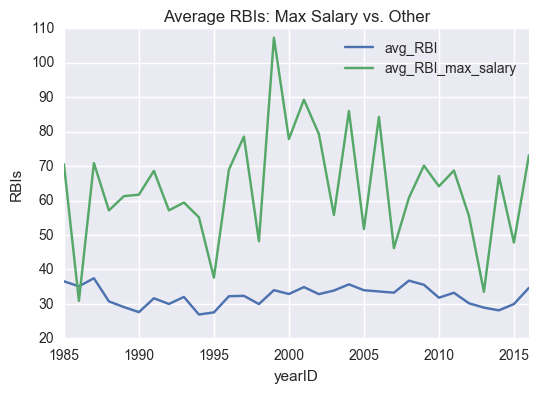

In [462]:
avg_rbi_plot = avg_rbi.plot(title='Average RBIs: Max Salary vs. Other')
avg_rbi_plot.set_ylabel('RBIs')


For the most part, players who receive the max salary for their given position usually have a higher rate of RBIs than do players not making the max salary. This is just an observation from the above graph, but one could do a hypthesis test to derive a conclusion with a high degree of confidence.

In [470]:
pitcher_stats = salary_position_df[salary_position_df['POS'] == 'P']

avg_era = pitcher_stats.groupby('yearID').mean()['ERA'].reset_index()

avg_era.head()

,yearID,ERA
0,1985,4.103394
1,1986,4.433138
2,1987,4.380141
3,1988,4.154632
4,1989,4.110962


In [479]:
pitcher_stats_max = salary_position_df[(salary_position_df['POS'] == 'P') & 
                   (salary_position_df['diff_from_max'] == 0)]

avg_era_max = pitcher_stats_max.groupby('yearID').mean()['ERA'].reset_index()

avg_era_max.head()

,yearID,ERA
0,1985,1.820
1,1986,5.615
2,1987,3.680
3,1988,3.860
4,1989,2.310


In [482]:
avg_era_df = pd.merge(avg_era, avg_era_max, on='yearID', how='inner')

avg_era_df.head()

,yearID,ERA_x,ERA_y
0,1985,4.103394,1.820
1,1986,4.433138,5.615
2,1987,4.380141,3.680
3,1988,4.154632,3.860
4,1989,4.110962,2.310


In [483]:
avg_era_df['avg_ERA'] = avg_era_df['ERA_x']

del avg_era_df['ERA_x']

In [484]:
avg_era_df['avg_ERA_max_salary'] = avg_era_df['ERA_y']

del avg_era_df['ERA_y']

In [486]:
avg_era_df = avg_era_df.set_index('yearID')

avg_era_df.head()

,avg_ERA,avg_ERA_max_salary
yearID,,
1985,4.103394,1.820
1986,4.433138,5.615
1987,4.380141,3.680
1988,4.154632,3.860
1989,4.110962,2.310


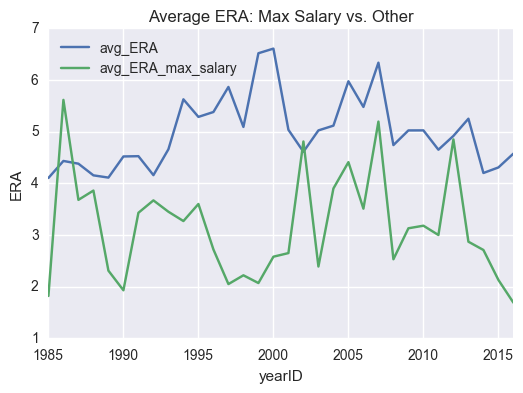

In [489]:
avg_era_plot = avg_era_df.plot(title='Average ERA: Max Salary vs. Other')
avg_era_plot.set_ylabel('ERA')

avg_era_plot

The pitching metric seems to be a little more volitle than the batting metric, though in most cases the max salary pitchers do have a lower ERA than others. A reason for this volatility may be due to the smaller sample size of pitchers verses all other positions.

All analysis in the project was based on observations from data. A proper hypthesis test would need to be conducted to draw any conclusions with a strong confidence.

After researching this data and especially after observing the batting and pitching metrics, some future reseach that would be worth pursing would be what is the optimal allocation of salaries between offensive scoring and defensive pitching to give you the highest production for the money spent?